# Carregando e tratando os Dados

- Não há a necessidade de tratar valores nulos, pois verificamos na EDA que não existem valores nulos.
- Um split de 80/20 é escolhido devido à baixa quantidade de samples no dataset, sendo importante garantir que existem amostras suficientes para realizar o treinamento.
- Não aplico normalização para o treinamento e validação do modelo RandomForest, por não ser necessário. No entanto, aplico normalização para o outro modelo escolhido (Logistic Regression)

In [302]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_wine
from sklearn.base import BaseEstimator

In [303]:
dataset = load_wine()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names) # type: ignore
y = pd.Series(dataset.target) # type: ignore

# Construindo o Modelo

Um classificador RandomForest é minha preferência ao estabelecer um baseline para um problema
pelas seguintes características:
- excelente performance em problemas de classificação
- a alta interpretabilidade de modelos de Árvore
- flexibilidade ao lidar com outliers, dados não normalizados, e features de menor valor (embora neste desafio eu já tenha tratado esses problemas)

Comparo a performance do RandomForest com um modelo LogisticRegression, escolhido pelos seguintes motivos:
- É um dos modelos de classificação mais simples, o que é bom para datasets pequenos
- Também possui alta interpretabilidade

Futuramente, durante a execução de um projeto, seria oportuno testar, também, outros classificadores. No entanto,
no escopo desse desafio, escolhi testar esses classificadores.

In [304]:
from sklearn.model_selection import cross_validate

def cross_validate_classifier(classifier: BaseEstimator, scorers: list[str], features: list[str]) -> None:
    cv_results = cross_validate(classifier, X[features], y, cv=5, scoring=scorers)

    for scorer in scorers:
        value = cv_results["test_" + scorer].mean()
        print(f"Average {scorer}: {value:.3f}")

In [305]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

selected_features = ["flavanoids", "color_intensity", "alcohol", "hue", "proline"]
scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"]

logistic_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(max_iter=10000))
])

cross_validate_classifier(logistic_pipeline, scoring, selected_features)

Average accuracy: 0.978
Average precision_macro: 0.979
Average recall_macro: 0.980
Average f1_macro: 0.979


In [306]:
from sklearn.ensemble import RandomForestClassifier

tree_classifier = RandomForestClassifier(
    criterion="gini",
    max_depth=10,
    random_state=1
)

cross_validate_classifier(tree_classifier, scoring, dataset.feature_names)  # trains with all features

Average accuracy: 0.978
Average precision_macro: 0.978
Average recall_macro: 0.981
Average f1_macro: 0.978


**Com as features previamente escolhidas**

Embora um algoritmo de árvores, como o Random Forest, não necessite de uma etapa prévia de seleção de features, incluí essa seção para analisar a efetividade das features selecionadas na etapa de EDA. Como visto, o modelo obteve performance similar, mesmo quando treinado apenas com essas features, o que é um indicador que o algoritmo de árvore também as selecionou durante o treinamento.

Obs: o mesmo poderia ser feito usando uma pipeline do sklearn com o Mutual Information Classifier, ao invés de listar "manualmente" as features, mas deixei manual por ser mais simples e rápido de implementar.

In [307]:
cross_validate_classifier(tree_classifier, scoring, selected_features)

Average accuracy: 0.972
Average precision_macro: 0.975
Average recall_macro: 0.975
Average f1_macro: 0.973


# Matriz de Confusão e Avaliação das Métricas

Ambos os modelos apresentaram excelente performance. Além disso, as métricas de ambos foram extremamente similares,
considerando a média simples entre classes, e usando validação cruzada. Isso indica algumas coisas:
- Como esperado, para um problema relativamente simples e com poucos dados como o dataset escolhido, o algoritmo Logistic Regression apresenta boa performance
- As features do dataset de vinhos provavelmente possuem relação linear com os targets
- A classe que causou mais problema para os modelos foi a classe 1, compondo 2 dos 4 erros do algoritmo de Regressão Logística, e 4 dos 4 erros do algoritmo Random Forest



In [308]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

def show_confusion_matrix(classifier: BaseEstimator, features: list[str]) -> None:
    y_pred = cross_val_predict(classifier, X[features], y, cv=5)
    confusion = confusion_matrix(y, y_pred)
    cm_plot = ConfusionMatrixDisplay(confusion)

    _, ax = plt.subplots(figsize=(8, 8))
    cm_plot.plot(cmap="Blues", ax=ax)
    plt.show()

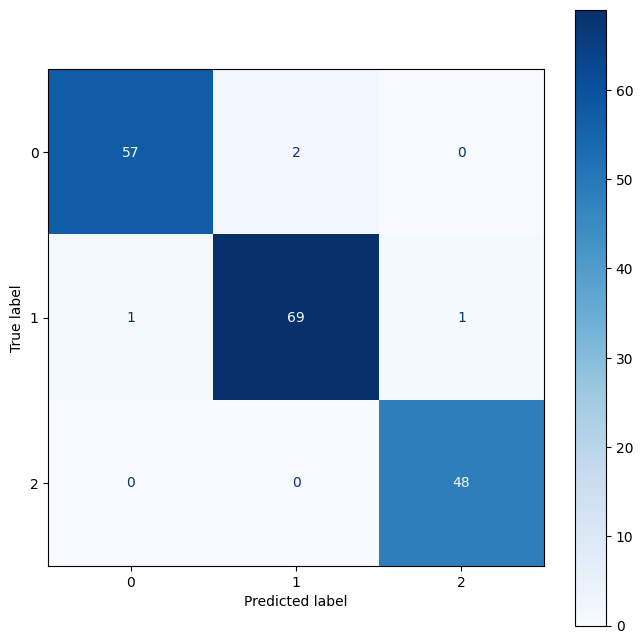

In [310]:
show_confusion_matrix(logistic_pipeline, selected_features)

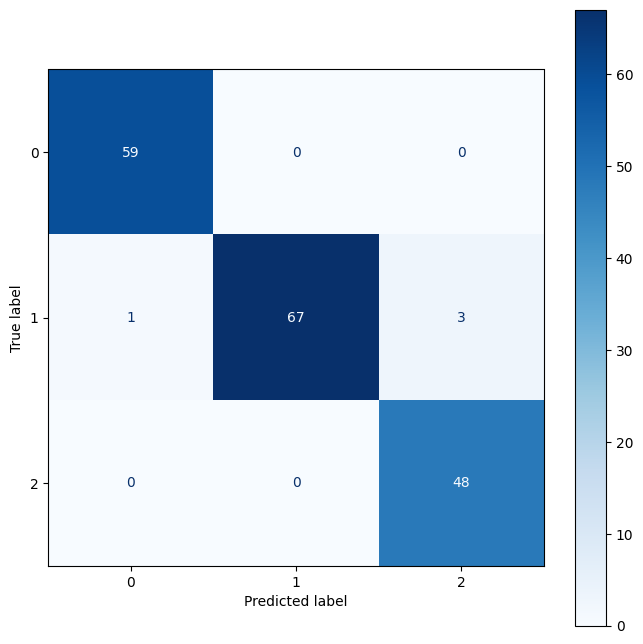

In [313]:
show_confusion_matrix(tree_classifier, dataset.feature_names)